<a href="https://colab.research.google.com/github/RoCkEtToMaN/Python/blob/master/Sezione13_ML_%26_Reti_Neurali_Artificiali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***ML & Reti Neurali Artificiali***

Vedremo come sviluppare una *Rete Neurale Artificiale* sfruttando Numpy

## ***Introduzione***

A livello intuitivo una NN

(Aggiungere i link)

Fino adesso abbiamo visto come si utilizza Python per sviluppare algoritmi (vedi esercizi Anni Bisestili, Email Valida o una calcolatrice).

Ma se dovessimo scrivere un algoritmo per l'identificazione di un gatto tramite una foto.
A questo, potremmo verificare ad esempio la presenza di baffi, nasi a cuoricino o etc...ma questi sarebbero dei vincoli poco credibili.

Oppure, creare un algoritmo per una guida automatica di una macchina: questo sarebbe troppotroppo onerosa.

Ma proviamo a vedere diversi modi di approcciarsi rispetto alla scrittura di un algoritmo: INPUT -> ALGORITMO -> OUTPUT


Ma adesso, proviamo a partire da: INPUNT -> ALGORITMO < - OUTPUT!

Questa è la variante del *ML Supervisionato*!

IN generale possiamo dividere in due passaggi la creazione dell'algorimo:



*   *Addestramento*: si mostrano es di input e di output
*   *Predizione*: passiamo dei dati e si va a testare l'algoritmo




Quando ci si approccia per la prima volta a Deep Learning e Reti Neurali si viene subito intimoriti dalla matematica che c’è dietro e si finisce a guardare le API di Tensorflow o a fare copia-incolla di pezzi di codice presi in giro per il web aggiungendo strati su strati.

In questo documento, andremo a commentare passo per passo quello che si è fatto nel documento sopra citato andando ad analizzare le parti matematiche senza prendere in considerazione tutte le librerie semplificative.


## ***Premesse***
- In questo tutorial creeremo una Shallow Neural Network, cioè una Rete Neurale con un’unico strato nascosto. Ampliare la Rete Neurale al caso di strati nascosti multipli non è per nulla complesso, a livello matematico non cambia nulla, a livello di codice bisogna lavorare un po’ di più. 

- La rete che andremo a creare è per problemi di classificazione binaria, quindi quando dobbiamo distinguere un caso positivo da uno negativo (es. distinguere uomo da donna), se vogliamo utilizzarla per altri tipi di problemi, come la classificazione multiclasse o la regressione, dobbiamo soltanto modificare la funzione di attivazione sullo strato di output e la funzione di costo che utilizziamo. Anche qui, se vuoi vedere degli esempi ad-hoc, fammelo sapere.


## ***Rete Neurale Artificiale***

Si hanno una rete di nodi disposti al minimo su tre strati:

INPUT LAYER   ->     HIDDEN LAYER      -> OUTPUT LAYER


Ogni *nodo di input*, contiene al suo interno una ***features*** del modello: proprietà che dobbiamo mappare all'output per riuscire a creare il nostro algoritmo.



*   Immagine: features -> pixel di ogni immagine
*   Abitazione: metratura, n di bagni, giardino



Nello *strato nascosto* (***hidden layer***), ci sono i nodi che tramite le features dello strato precedente cercano di apprendere nuove features per risolvere il problema: ossia piu significative.



*   Abitazione: tramite le features di input, magari può creare una nuova features come il *livello di sicurezza* del quartiere 




Nello ***strato output***, unico nodo che rappresenta l'output della rete.

*  Gatto: alla fine ci dirà se è un gatto o no ( problema di Classificazione)
*  Abitazione: per stimare il valore, avremo un valore numerico stimato per l'abitazione.
In questo caso, che il valore dell'output è continuo, si tratta di *regressione*.






### ***Creiamo una classe per la Rete Neurale***

Creiamo una classe NeuralNetwork, nel costruttore passeremo soltanto un parametro hidden_layer_size, che conterrà il numero di nodi (o neuroni) dello strato nascosto.




```
class NeuralNetwork:
  
  
  def __init__(self, hidden_layer_size=100):
    
    self.hidden_layer_size=hidden_layer_size
```



### ***La Metrica***
Le metriche sono un’argomento generale di un qualsiasi modello Machine Learning e non limitate alle sole Reti Neurali, queste ci permettono di determinare la qualità del nostro modello comparando le predizioni da esso fornite con i risultati reali presenti all’interno del dataset.







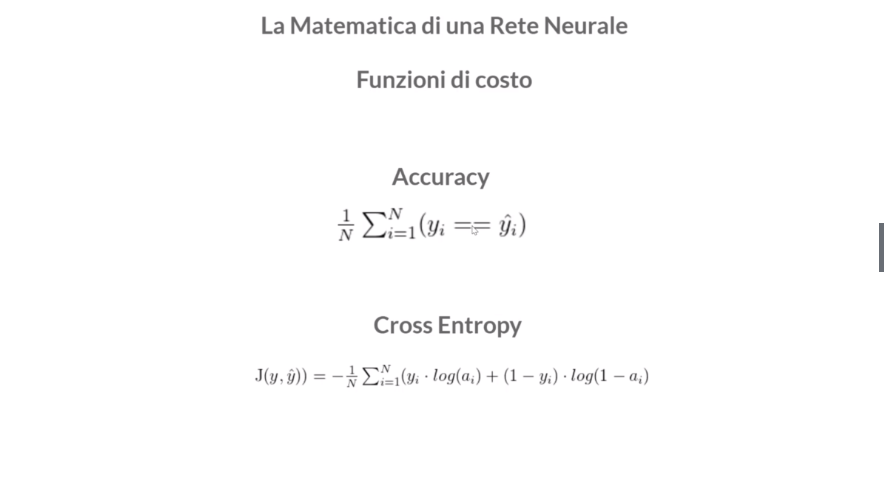


#### ***Accuracy***

Una metrica comune per problemi di classificazione è l’accuracy che in sostanza indica semplicemente la percentuale di predizioni che il nostro modello ha azzeccato.





image.png

- *𝑦̂_i*:  sono le predizioni del modello
- *y_i*:  vettore con i valori reali 


L’accuracy è una funzione di scoring che ritorna un valore compreso tra 0 e 1, dove un valore **maggiore** indica una **qualità migliore del modello** (eccezion fatta per casi di overfitting, ma di questo parleremo più avanti).





```
def _accuracy(self, y, y_pred):
  return np.sum(y==y_pred)/len(y)
```

- **Limite**: non tiene conto della probabilità che una predizione sia corretta, quindi un’errore grossolano assume lo stesso peso di un’errore minore

#### ***Log Loss***


Per il limite dell'*Accuracy*, è sempre una buona affiancarla ad un altra metrica che tiene conto di questa informazione, cioè la **Cross Entropy** anche conosciuta come **Log Loss**.


image.png

- *y_i*:  valori reali
- *a_i*:  probabilità di appartenenza alla classe positiva 



- Questa funzione a differenza di quella prima, è un ***funzione di costo*** e quindi un suo valore minore indica una migliore qualità del modello.






```
def _log_loss(self, y_true, y_proba):
  return -np.sum(np.dot(y_true,np.log(y_proba))+np.dot((1-y_true),np.log(1-y_proba)))/len(y_true)

```


**Dot** è il prodotto scalare tra due vettori, che è così definito:



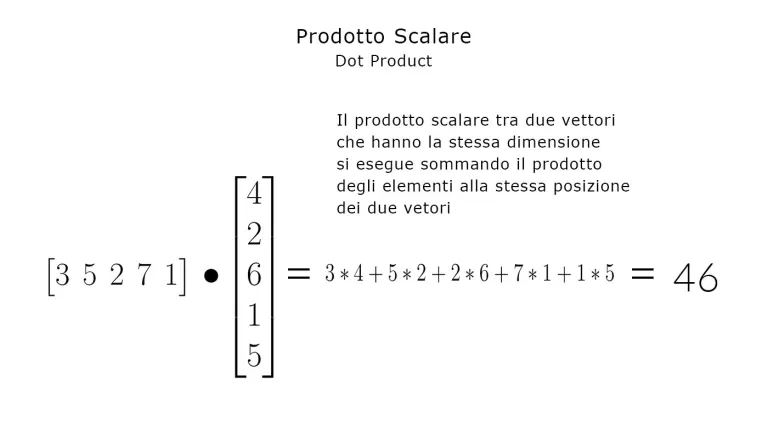

Per quantificare la qualità del modello, noi utilizziamo queste funzioni. Ci permettono di calcolare la capacità predittiva della rete con un unico valore che ci indica la % degli errori che questa commette.



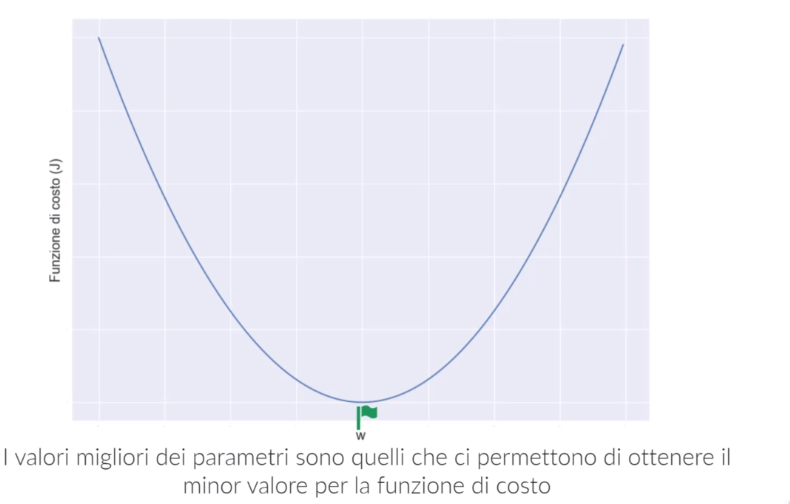


### *I Pesi*

I nodi dello strato precedente rispetto a quelli dello strato successivo vengono mappati tramite i pesi\coefficienti.

Questi ultimi rappresentano il valore che queste features hanno per lo scopo della rete.


Se consideriamo un nodo qualsiasi, il suo valore è dato dalla somma dei nodi dello strato precedente ma prima vengono moltiplicati per il loro cefficienti.
In più possiamo vedere un valore sommatto, il *bias*, ossia un predugizio iniziale alla rete, questo è sempre presente anche quando le proprietà di partenza valgono zero. 



> $s_{i+1} = s_{i} *w+b$


Il bias, viene chiamato anche *"net input"* e su questa viene applicata una ***funzione di attivazione***.
Ci permette di aggiungere una non linearità alla nostra rete.
Nel caso non si applicasse questa non linearità, avere una rete senza strati nascosti ed una con 100 strati nascosti, le due reti sarebbero identiche a livello di funzionalità.


La funzioni di attivazione più comuni sono:



*   *Relù*: per gli strati nascosti
*   *Sigmoide*: per gli strati di output, adatto per decisioni, classificazione binaria questa funzione è ottima.















Vediamo questo modello si chiama ***Shallow Neural Network***!




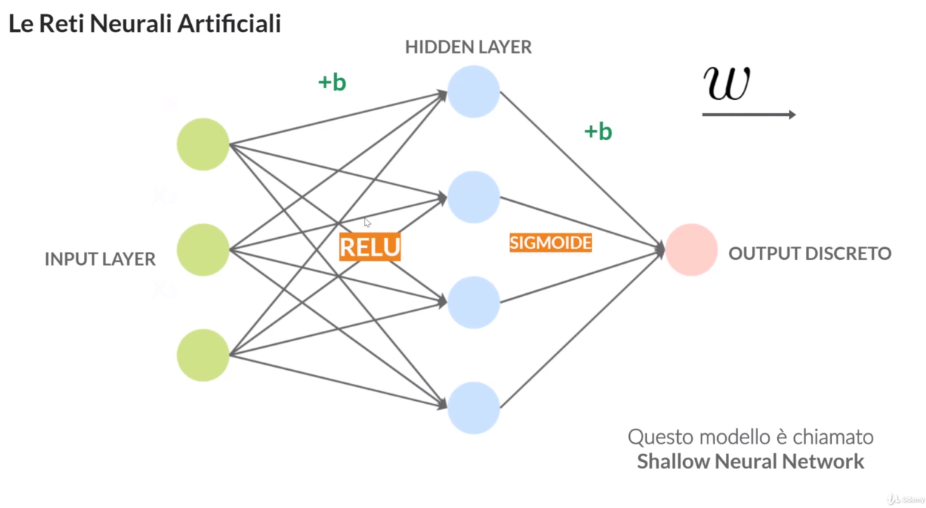

### ***Addestramento***


Con questo concetto, si indica il trovare il valore dei pesi, "*b*", che permettono alla rete di ottenere delle previsioni migliori.

L’*addestramento* della maggior parte dei modelli di machine learning si basa sull’utilizzo di un algoritmo di ottimizzazione, il più comune è il Gradient Descent.



Vediamo come i valori di pesi/bias migliore sono quelli che ci permettono di ottenere il minor valore della funzione di costo.



*   Come facciamo ad ottenere questi valori?




#### ***Algoritmi***

IL pià famoso nel ML è:



> * ***Gradient Descent***: 








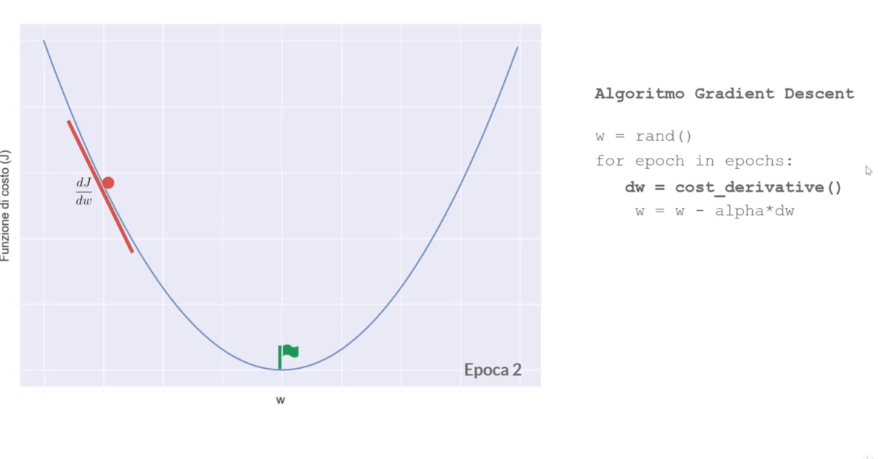

Il funzionamento di questo algoritmo è abbastanza semplice: al valore di ogni coefficiente viene iterativamente sottratto il valore della derivata parziale della funzione di costo rispetto al coefficiente moltiplicata per una costante, chiamata Learning Rate, e questo per un numero definito di cicli, chiamati epoche.




Si inizializzano i pesi con valori casuali ed ad ogni epoca, si calcola il gradiente per un determinato di cicli della funzione di costo rispetto i vari parametri.
La *derivata* ci permette di quantificare quanto una funzione sta crescendo/descrescendo in punto e nel caso di funzione a piu variabili, abbiamo una derivata per ognuno di essa (derivata parziale) dicendoci quanto queste contribuiscono per il raggiungimento del nostro obiettivo.





```
w = rand()
for epoch in epochs:
    dw = cost_derivative()
    w = w - alpha * dw    
```

Vediamo come l'algoritmo si evolve: si calcola la derivata rispetto al parametro/peso, si andrà a sottrarre al valore del parametro corrente il valore della derivata moltiplicata per una costante.



*   *Alpha= Learning Rate*: manipoliamo il passo di ogni update dei coefficienti.




Continuando coi passi, l'alogoritmo tende a minimizzare e quindi ad ottimizzare la funzione di costo!









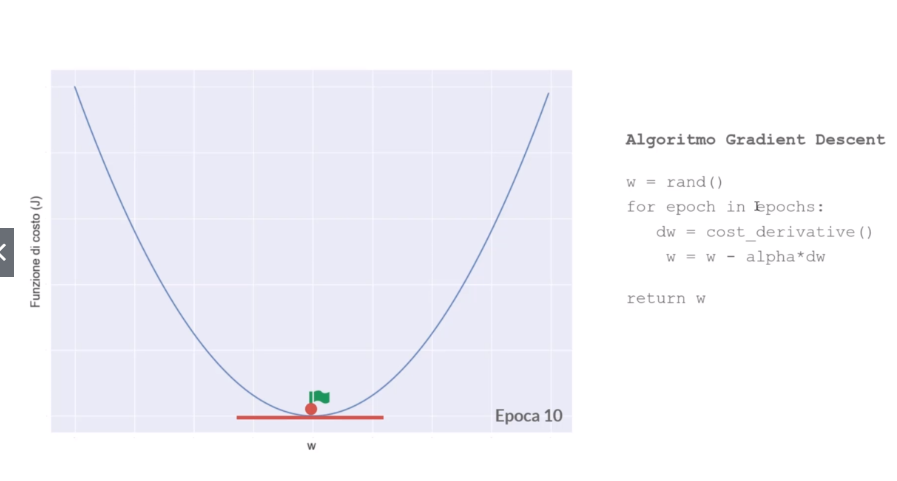

La *derivata di una funzione* è un’altra funzione derivata da essa (e da qui il nome) che indica quanto velocemente la funzione sta crescendo/decrescendo in un determinato punto.



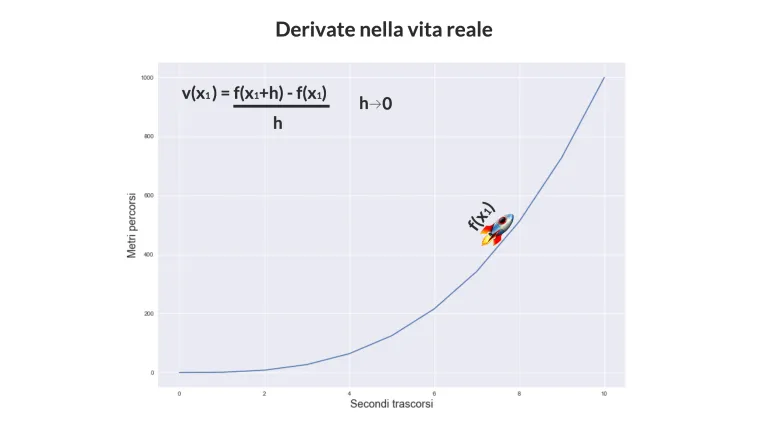

Se in un dato punto la funzione sta crescendo in maniera molto rapida, la sua derivata sarà un valore positivo grande, al contrario se la funzione sta decrescendo in maniera molto rapida la sua derivata sarà un valore negativo molto grande. Se invece la funzione è costante, quindi mantiene lo stesso valore, allora la derivata varrà 0.

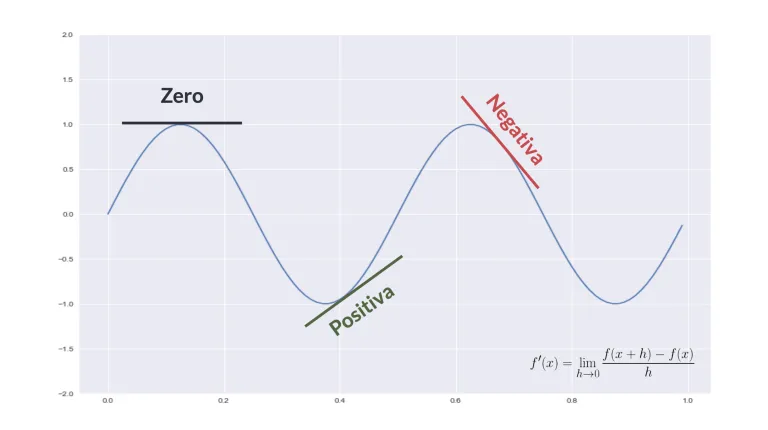

**Esistono 3 diversi** tipi di notazioni per indicare una derivata: la notazione di Lagrange, quella di Newton e quella di Leibniz.*testo in corsivo*

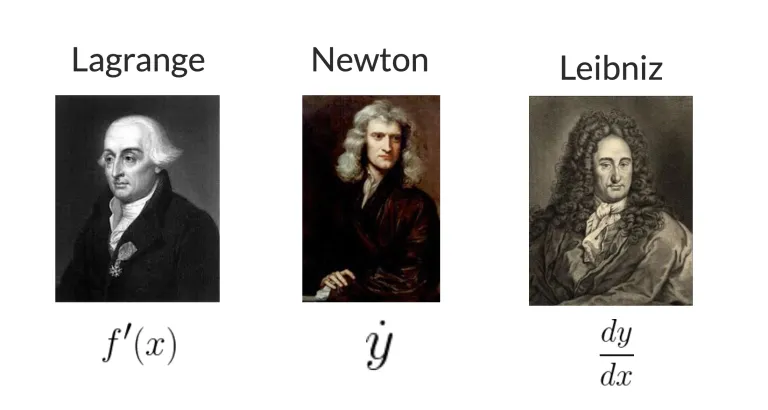

In questo tutorial useremo quella di Leibniz, che poi è quella più utilizzata nel caso di funzioni a più variabili.

Parlando di funzioni a più variabili, se una funzione ha più variabili allora ha più derivate, dato che ogni variabile può contribuire alla variazione della funzione in maniera differente, in questo caso si parla di derivate parziali, che messe insieme formano il gradiente della funzione, che si indica con il simbolo nabla (il triangolo sotto sopra che vedi qui sotto)

image.png

In parole povere il Gradient Descent funziona così: i valori ‘ideali’ dei coefficienti sono quelli che ci permettono di ottenere il valore minore per la funzione di costo, cioè quelli che la minimizzano, sommando iterativamente il valore delle rispettive derivate parziali della funzione di costo tendiamo a ‘spingere’ i coefficienti verso tale punto di minimo.

Il learning rate ci permette di impostare la forza di tale spinta, o meglio la dimensione di ogni step (epoca) del Gradient Descent.

Probabilmente non giungeremo mai ai coefficienti ideali, ma utilizzando un numero sufficiente di epoche potremmo riuscire a stimarli con un buon grado di approssimazione.

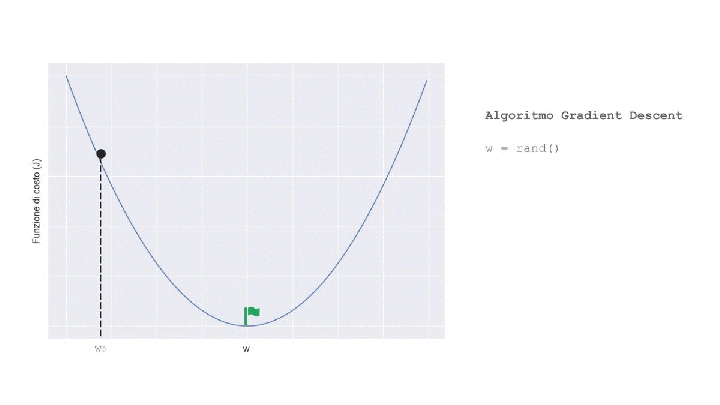

Implementiamo il Gradient Descent per la nostra Rete Neurale, per adesso ignora la funzione per calcolare le derivate parziali, ci arriveremo tra pochissimo:




```
def fit(self, X, y, epochs=200, lr=0.01):
     
    for _ in range(epochs):
      Y = self._forward_propagation(X)
      dW1, db1, dW2, db2 = self._funzione_magica_che_calcola_le_derivate_parziali(X, y)
      self._W1-=lr*dW1
      self._b1-=lr*db1
      self._W2-=lr*dW2
      self._b2-=lr*db2
```


Learning Rate e numero di Epoche sono due dei tanti iperparametri di una rete neurale, cioè quei valori che tocca a noi definire manualmente.

Per una rete neurale il numero di epoche andrebbe sempre impostato almeno a 100, mentre il Learning Rate va cercato in uno spazio di potenze di 10 che va da 10^{-4} (0.0001) a 10.


Questo è l'algoritmo del Gradient Descending!

Nel caso di ML senza strati aggiuntivi (*Regressione Lineare, Regressione Logistica*) è sufficente calcolare la derivata della funzione di costo  ed applicarla alla formula.



Se si fosse trattato di una *regressione logistica*, differenziare la funzione di costo sarebbe stato un gioco da ragazzi della quinta liceo classico rimandati per tre anni di fila in matematica, ma nel caso di una rete neurale è molto più complesso, infatti una rete neurale è formata da più funzioni composte, cioè funzioni che hanno come argomento altre funzioni, se non ci credi pensa che le equazioni della forward propagation possono anche essere espresse come un’unica equazione incomprensibile, questa qui nel caso di una Shallow Neural Network





image.png

dove con g intendiamo la funzione ReLu.

Ora noi dobbiamo riuscire a sapere quanto ogni coefficiente di ogni strato contribuisce all’errore della rete e questo problema non è per nulla banale ! Infatti gli scienziati ci si sono arrovellati sopra per 50 anni, fino al 1984, quando si arrivò ad una soluzione, la *Backpropagation* (propagazione all’indietro o retropropagazione).

> * ***Backpropagation***: 





Per Reti Neurali, il discorso è più complesso.
Si necessita la consocenza non solo dei parametri dell'ultimo strato che hanno contribuito all'errore ma di tutti quelli di tutti gli strati!

Questo algoritmo ci permette di sapere quanto ogni *parametro/ peso/ bias* di ogni strato ha contribuito all'errore del modello propagando l'errore dell'ultimo strato all'indietro!


L’algoritmo si basa su una proprietà delle derivate, chiamata Chain Rule (Regola della Catena), che ci dice che la derivata di una funzione composta è pari al prodotto della derivata più esterna, avente come argomento la funzione interna, per la derivata della funzione interna.

Quindi se abbiamo una funzione f(x) tale che:



image.png


che quindi è una funzione composta, possiamo calcolare la sua derivata come


image.png



Utilizzando tale proprietà possiamo propagare il segnale all’indietro (e qui il nome) e calcolare le varie derivate parziali!!!

Applicando la chain rule, otteniamo le seguenti equazioni per il calcolo delle derivate parziali:

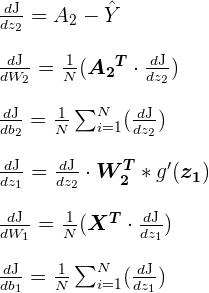

Ricordi la cache con i risultati intermedi della forward propagation ? Bene è qui che ci serve ! Infatti come vedi per poter eseguire la backpropation, e quindi per poter applicare la chain rule, abbiamo bisogno di questi valori.



```
def _relu_derivative(self, Z):
    dZ = np.zeros(Z.shape)
    dZ[Z>0] = 1
    return dZ
def _back_propagation(self, X, y):
  
    Z1, A1, Z2, A2 = self._forward_cache
                   
    m = A1.shape[1]
    
    dZ2 = A2-y.reshape(-1,1) # il reshape ci serve per far combaciare le dimensioni dei due vettori
    dW2 = np.dot(A1.T, dZ2)/m
    db2 = np.sum(dZ2, axis=0)/m
    dZ1 = np.dot(dZ2, self._W2.T)*self._relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1)/m
    db1 = np.sum(dZ1, axis=0)/m # eseguiamo la somma lungo le righe
    
    return dW1, db1, dW2, db2
```


All’interno della metodo fit sostituiamo la funzione_magica_per_calcolare_le_derivate_parziali con la back_propagation che abbiamo appena definito:




```
def fit(self, X, y, epochs=200, lr=0.01):
           
    for _ in range(epochs):
      Y = self._forward_propagation(X)
      dW1, db1, dW2, db2 = self._back_propagation(X, y)
      self._W1-=lr*dW1
      self._b1-=lr*db1
      self._W2-=lr*dW2
      self._b2-=lr*db2
```

Vediamo ora, come ***inizializzare i coefficenti***.

Possiamo inizializzare i bias a 0, ma non i pesi ! Inizializzando i pesi a 0 le derivate parziali di tutti i pesi avranno lo stesso valore per tutte le iterazioni, questo vuol dire che il nostro modello non sarà migliore di un modello lineare.


- I pesi andrebbero inizializzati a valori casuali né troppo grandi né troppo piccoli, infatti:
Se i pesi vengono inizializzati a valori troppo grandi, nel caso di una rete abbastanza *profonda* il gradiente diventerà ancora più grande, a causa delle varie moltiplicazioni tra valori elevati alla quale è soggetto, questo problema è chiamato **Exploding Gradient Problem** (**Problema dell’esplosione del Gradiente**).

- Se i pesi vengono inizializzati a valori troppo piccoli il problema è l’inverso, durante la backpropagation calcoleremo il gradiente eseguendo delle moltiplicazioni per valori molto piccoli, quindi questo tenderà a ridursi verso lo zero, questo problema è chiamato **Vanishing Gradient Problem** (**Problema della Scomparsa del Gradiente**).



Esistono tecniche sofisticate per l’inizializzazione intelligente dei pesi, ma nel nostro caso stiamo realizzando una rete neurale con un solo strato nascosto, quindi non dovremmo preoccuparci di questi problemi, selezioniamo i pesi da una semplice distribuzione normale, cioè una distribuzione con **media pari a 0 e deviazione standard pari a 1**.




```
def _init_weights(self, input_size, hidden_size):
    
    self._W1 = np.random.randn(input_size, hidden_size)
    self._b1 = np.zeros(hidden_size)
    self._W2 = np.random.randn(hidden_size,1)
    self._b2 = np.zeros(1)
```

Aggiungiamo l’inizializzazione dei coefficienti all’inizio del metodo *fit*:



```
def fit(self, X, y, epochs=200, lr=0.01):
     
    self._init_weights(X.shape[1], self.hidden_layer_size)
      
    for _ in range(epochs):
      Y = self._forward_propagation(X)
      dW1, db1, dW2, db2 = self._back_propagation(X, y)
      self._W1-=lr*dW1
      self._b1-=lr*db1
      self._W2-=lr*dW2
      self._b2-=lr*db2
```






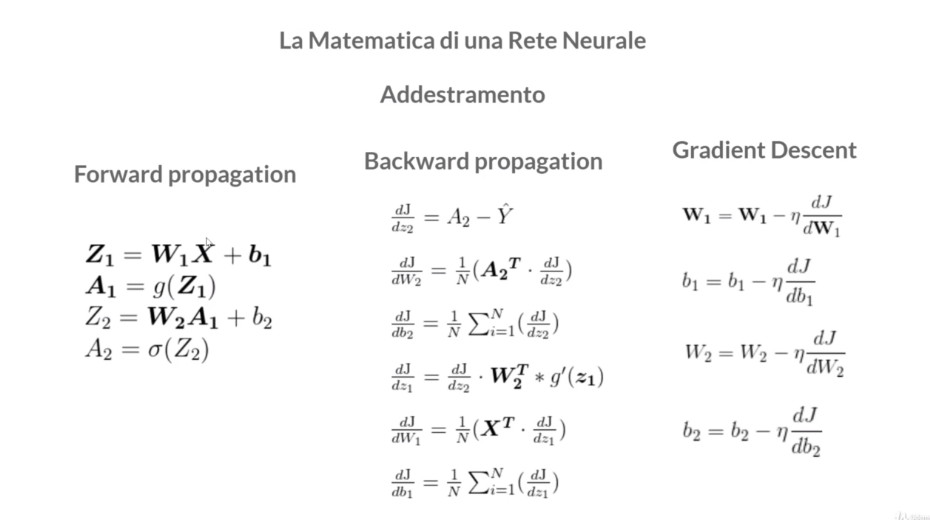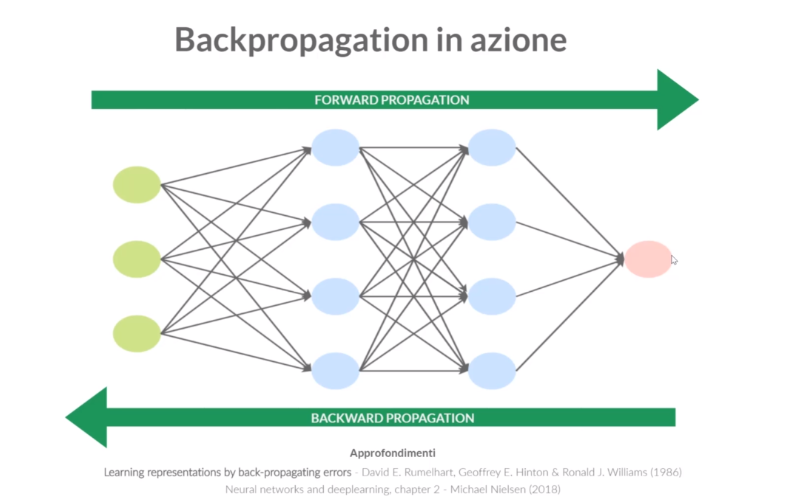


Quindi questo è quanto ci serviva sapere.

Inizialmente seguiamo una Forward Propagation, ossia il calcolo del valore dell'output che si utilizzerà per calcolare l'errore.
Una volta ottenuto l'errore, torniamo indietro!
Backward Propagation ci servirà per ricostruire quanto ogni parametro di ogni nodo ha contribuito a tale errore: derivata parziale.

Questo procedimento ci porterà allo *strato Input*.




### ***Predizione***

La predizione è la fase in cui utilizziamo i coefficienti appresi dal modello per classificare una data osservazione. In un *modello lineare*, come la ***regressione logistica***, la classificazione avviene semplicemente moltiplicando le features dell’osservazione con i rispettivi pesi e sommando il bias, per poi far passare tale valore attraverso una funzione di attivazione.

In una Rete Neurale il discorso è più complesso, abbiamo più coefficienti disposti su più strati disposti in sequenza, nel caso di una ***Shallow Neural Network*** abbiamo tre strati, uno di input, uno nascosto e uno di output, 2 matrici di pesi, una che collega ogni nodo dello strato input ad ogni neurone dello strato nascosto e una che collega ogni nodo dello strato nascosto all’unico nodo dello strato di output, oltre ovviamente ai due rispettivi vettori con i bias, che vengono sempre trascurati.


In una rete neurale la predizione avviene a cascata, l’input della rete arriva allo strato di input, viene moltiplicato per i pesi dello strato e viene sommato il bias in questo modo:

image.png



Ora l’output dello strato di input diventerà l’input dello strato nascosto, questo processo è conosciuto come **Forward Propagation** (**Propagazione in Avanti**) e queste sono le sue equazioni:


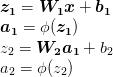

I vari vettori z sono gli output lineari dello strato, anche chiamati ***net input***, come vedi a questi vettori viene applicata una *funzione phi* , questa funzione è la funzione di attivazione di cui parlavamo prima e ci permette di aggiungere la non linearità alla nostra rete, ***senza di essa una rete neurale, anche una molto profonda, porterebbe agli stessi risultati di un semplice modello lineare come la regressione logistica***.






Esistono diverse funzioni di attivazione e variano in base al tipo di strato, per gli strati nascosti la più utilizzata e la Rectified Linear Unit (ReLu) che è così definita:


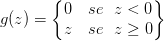





Implementiamola in un metodo della nostra classe:



```
def _relu(self, Z):
  return np.maximum(Z, 0)
```


Per gli strati di output la funzione di attivazione da utilizzare dipende dal tipo di problema che stiamo affrontando, per una classificazione binaria bisogna usare la sigmoide, che è così definita.

image.png



Implementiamo un metodo anche per la sigmoide:




```
def _sigmoid(self, Z):
  return 1/(1+np.power(np.e,-Z))
```

Aggiungendo le corrette funzioni di attivazione, le equazioni della Forward Propagation diventano le seguenti:

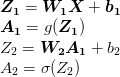





Usiamo le equazioni per implementare un metodo per la Forward Propagation:



```
def _forward_propagation(self, X):
    
  Z1 = np.dot(X,W1)+b1
  
  A1 = relu(Z1)
  Z2 = np.dot(A1,W2)+b2
  A2 = sigmoid(Z2)
  
  self.cache = (Z1, A1, Z2, A2)
  
  # usiamo il metodo .ravel()
  # per convertire A2 in un array 1D
  return A2.ravel()
```

Ora, l’ultimo strato ci ritorna la probabilità che l’osservazione in input appartenga alla classe positiva:

- un’osservazione con una probabilità maggiore del 50% va classificata come appartenenza alla classe positiva
- un’osservazione con probabilità minore del 50% va classificata come appartenente alla classe negativa.


Per standard, qualora la probabilità fosse esattamente del 50% classifichiamola come positiva, anche se non è attendibile, in ogni caso insieme ad una classificazione dobbiamo sempre prendere in considerazione la probabilità della sua correttezza.

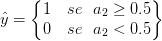




Utilizziamo queste informazioni per creare il metodo per eseguire la predizione:


```
def predict(self, X):
    proba = self._forward_propagation(X)
    y = np.zeros(X.shape[0])
    y[proba>=0.5]=1
    y[proba<0.5]=0
    return y
```

In base a quanto detto, definiamo anche un metodo per ottenere la probabilità, che poi non sarà altro che un’alias del metodo _forward_propagation:



```
def predict_proba(self, X):         
    return self._forward_propagation(X)
```

La fase di predizione è completa, passiamo all’addestramento, dove permetteremo alla nostra rete di apprendere i sui coefficienti dai dati in maniera autonoma.



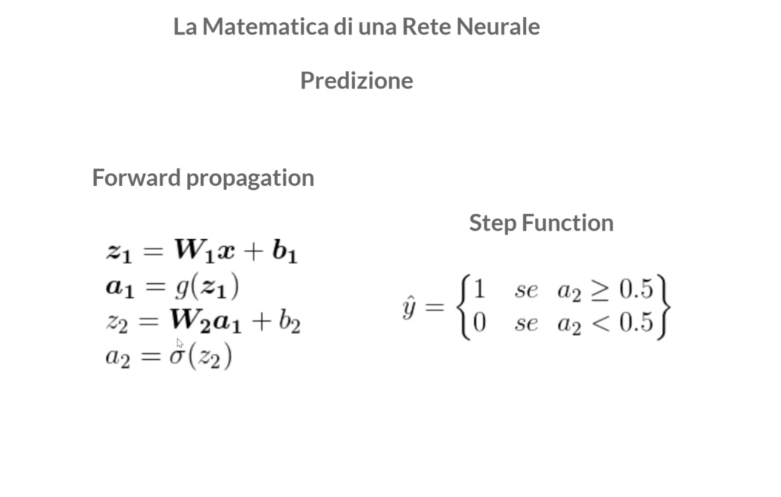




### ***Funzioni di Attivazione***

Andiamo a vedere la matematica che si utilizza durante l'implemantazione di queste funzioni.






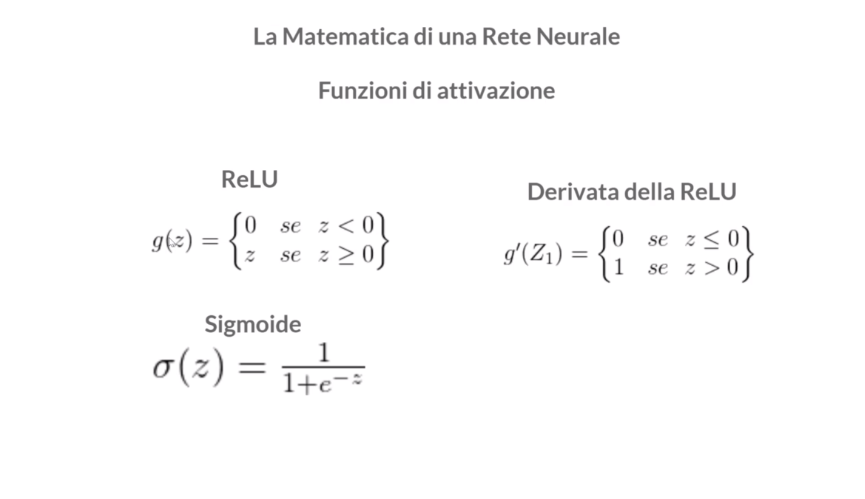

Non vi sono tante cose da aggiungere oltre alle formule che sono abbastanza chiare.